In [1]:
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”
Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [136]:
ps = import_biom("../data/Seq_data/QCSeqs/otu_table.tax.meta.biom")

In [137]:
colnames(sample_data(ps))

[1] "pH_Organic"                     "K_ICP_mg_kg"                   
 [3] "Understory_CBI"                 "Replicate"                     
 [5] "Forest"                         "Fwd_Primer_Barcode"            
 [7] "K_mg_kg"                        "pH_Mineral"                    
 [9] "Al_ICP_mg_kg"                   "nTrees"                        
[11] "Total_C_Organic_pct"            "Ca_ICP_mg_kg"                  
[13] "EC_Mineral_mS_cm"               "Land_Class"                    
[15] "Pct_Exposed_Mineral"            "CFSI"                          
[17] "Ca_mg_kg"                       "Mg_mg_kg"                      
[19] "wdir"                           "Total_C_Mineral_pct"           
[21] "dc"                             "bui"                           
[23] "Total_N_Organic_pct"            "Total_N_Mineral_pct"           
[25] "Na_ICP_mg_kg"                   "Min_TIC_suspect"               
[27] "Burn_Severity_Index"            "Total_Org_C_Organic_pct_acid"  
[29] "Cu_ICP_mg_kg"                   "TIC_Mineral_pct"               
[31] "Revcomp_Rev_Primer_Barcode"     "dmc"                           
[33] "P_ICP_mg_kg"                    "temp"                          
[35] "Site_ID"                        "Na_mg_kg"                      
[37] "Zn_ICP_mg_kg"                   "Live_Trees"                    
[39] "Dead_Trees"                     "ffmc"                          
[41] "O_Depth_cm"                     "Mo_ICP_mg_kg"                  
[43] "EC_Organic_mS_cm"               "Veg_Comm"                      
[45] "Project_ID"                     "Org_or_Min"                    
[47] "Total_S_Mineral_pct"            "Org_TIC_suspect"               
[49] "Total_Org_C_Mineral_pct_acid"   "precip"                        
[51] "Sand_pct"                       "rh"                            
[53] "Overstory_CBI"                  "S_ICP_mg_kg"                   
[55] "Sample_Name"                    "RBR"                           
[57] "Rev_Primer_Barcode"             "Mg_ICP_mg_kg"                  
[59] "ws"                             "TIC_Organic_pct"               
[61] "Total_Org_C_Organic_pct_muffle" "Fe_ICP_mg_kg"                  
[63] "fwi"                            "CBI"                           
[65] "Silt_pct"                       "isi"                           
[67] "Clay_pct"                       "Severity_Class"                
[69] "Sample_ID"                      "Mn_ICP_mg_kg"                  
[71] "Total_Org_C_Mineral_pct_muffle" "CEC_cmol_kg"                   
[73] "Mean_Duff_Depth_cm"

In [138]:
sample_data(ps)$pH = as.numeric(ifelse(sample_data(ps)$Org_or_Min=="O", sample_data(ps)$pH_Organic, sample_data(ps)$pH_Mineral))
sample_data(ps)$Total_C_pct = as.numeric(ifelse(sample_data(ps)$Org_or_Min=="O", sample_data(ps)$Total_C_Organic_pct, sample_data(ps)$Total_C_Mineral_pct))
sample_data(ps)$Total_N_pct = as.numeric(ifelse(sample_data(ps)$Org_or_Min=="O", sample_data(ps)$Total_N_Organic_pct, sample_data(ps)$Total_N_Mineral_pct))
sample_data(ps)$pH_Mineral= as.numeric(sample_data(ps)$pH_Mineral)
sample_data(ps)$pH_Organic= as.numeric(sample_data(ps)$pH_Organic)
sample_data(ps)$Burn_Severity_Index= as.numeric(sample_data(ps)$Burn_Severity_Index)
sample_data(ps)$CBI= as.numeric(sample_data(ps)$CBI)
sample_data(ps)$RBR= as.numeric(sample_data(ps)$RBR)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [139]:
tax = read.csv("../data/Seq_data/QCSeqs/Taxonomy/otus_tax_assignments.txt",sep=";",header=FALSE)
colnames(tax)=c("OTU_ID","Kingdom","Phylum","Class","Order","Family","Genus","Species")
row.names(tax)=tax[,1]
tax2=tax[match(taxa_names(ps), row.names(tax)),]
TT=tax_table(tax)
row.names(TT)=TT[,1]
colnames(TT)=c("OTU_ID","Kingdom","Phylum","Class","Order","Family","Genus","Species")
tax_table(ps)=TT

Warning message in .local(object):
“Coercing from data.frame class to character matrix 
prior to building taxonomyTable. 
This could introduce artifacts. 
Check your taxonomyTable, or coerce to matrix manually.”

In [140]:
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)

In [141]:
ps.wb.pruned = prune_samples(sample_sums(ps.wb)>=1000, ps.wb)

In [142]:
ps.wb.pruned.norm = transform_sample_counts(ps.wb.pruned, function(x) x / sum(x) )

In [143]:
ps = ps.wb.pruned.norm

In [77]:
ord = ordinate(ps, method = "NMDS", distance = "bray", weighted=TRUE, k=2, trymax=1000)

Run 0 stress 0.1373657 
Run 1 stress 0.1373437 
... New best solution
... Procrustes: rmse 0.00140003  max resid 0.01158585 
Run 2 stress 0.15767 
Run 3 stress 0.1373662 
... Procrustes: rmse 0.001410791  max resid 0.01165021 
Run 4 stress 0.1576698 
Run 5 stress 0.1373437 
... New best solution
... Procrustes: rmse 6.208718e-05  max resid 0.0006776656 
... Similar to previous best
Run 6 stress 0.1373436 
... New best solution
... Procrustes: rmse 3.054293e-05  max resid 0.0003653176 
... Similar to previous best
Run 7 stress 0.1373656 
... Procrustes: rmse 0.001432567  max resid 0.01163836 
Run 8 stress 0.1373436 
... New best solution
... Procrustes: rmse 2.88866e-05  max resid 0.0002283369 
... Similar to previous best
Run 9 stress 0.1373656 
... Procrustes: rmse 0.001439974  max resid 0.0116762 
Run 10 stress 0.1724698 
Run 11 stress 0.1745315 
Run 12 stress 0.1576699 
Run 13 stress 0.1373657 
... Procrustes: rmse 0.001446124  max resid 0.01171287 
Run 14 stress 0.1373436 
... Proc

In [148]:
ps.plot = prune_samples(sample_data(ps)$Org_or_Min != "B",ps)
ord = ordinate(ps.plot, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=100)

Run 0 stress 0.1011947 
Run 1 stress 0.1022936 
Run 2 stress 0.1054347 
Run 3 stress 0.1000235 
... New best solution
... Procrustes: rmse 0.0145482  max resid 0.1041988 
Run 4 stress 0.1031397 
Run 5 stress 0.1012979 
Run 6 stress 0.1001941 
... Procrustes: rmse 0.01199019  max resid 0.1039091 
Run 7 stress 0.1005307 
Run 8 stress 0.1027746 
Run 9 stress 0.1007268 
Run 10 stress 0.1024202 
Run 11 stress 0.100493 
... Procrustes: rmse 0.004255907  max resid 0.05477444 
Run 12 stress 0.1007362 
Run 13 stress 0.102337 
Run 14 stress 0.1009297 
Run 15 stress 0.1017262 
Run 16 stress 0.1022603 
Run 17 stress 0.1001916 
... Procrustes: rmse 0.01198735  max resid 0.1039068 
Run 18 stress 0.1009861 
Run 19 stress 0.1027359 
Run 20 stress 0.1014501 
Run 21 stress 0.1051957 
Run 22 stress 0.1002082 
... Procrustes: rmse 0.01162338  max resid 0.1035639 
Run 23 stress 0.1042881 
Run 24 stress 0.1032976 
Run 25 stress 0.1002239 
... Procrustes: rmse 0.009712119  max resid 0.09805829 
Run 26 stress

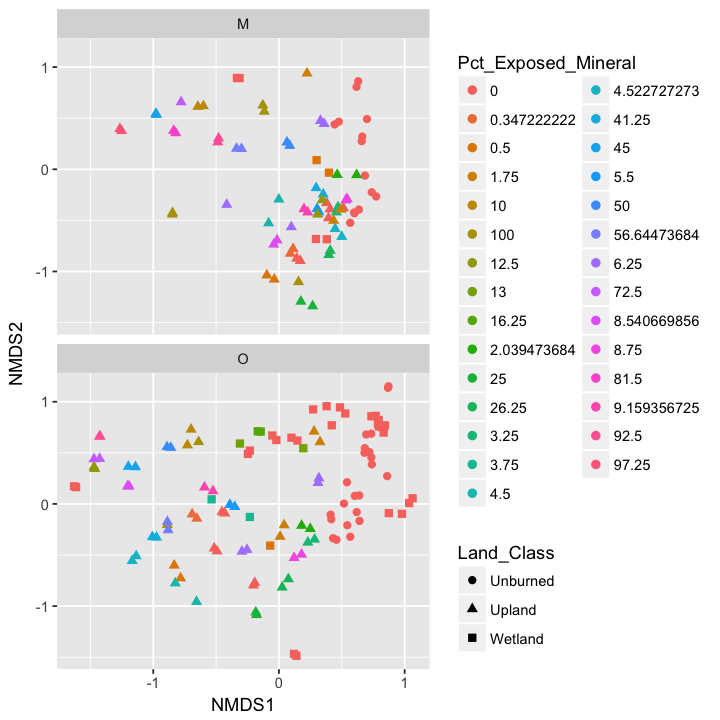

In [189]:
options(repr.plot.width=6, repr.plot.height=6)

#sample_data(ps.plot)$Org_or_Min=droplevels(sample_data(ps.plot)$Org_or_Min)
p = plot_ordination(ps.plot, ord, color = "Pct_Exposed_Mineral",shape="Land_Class")

p = p  + geom_point(size=2) + facet_wrap(~Org_or_Min, ncol=1) #+ scale_color_gradient(low="red",high="blue") 
p

In [186]:
#ord = ordinate(ps.plot, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=1000)
NMDS.coords = data.frame(ord$points)
# Extracting the coordinates from the ordination
NMDS.coords = merge(NMDS.coords,sample_data(ps.plot), by = 0)
# Merging it with the sample data, by rowname (the same)
#NMDS.coords = NMDS.coords %>%
#    filter(Org_or_Min=="M")
plot_ly(NMDS.coords, x = NMDS.coords$MDS1, y = NMDS.coords$MDS2, z = NMDS.coords$MDS3, color = ~NMDS.coords$CBI
        #, colors = c("red3","tan4","darkorange","skyblue3","chartreuse4")
        , symbol = NMDS.coords$Land_Class, symbols = 1:3
        #, alpha = 0.5
       )%>%
    layout(scene = list(xaxis = list(title = "NMDS1"), yaxis = list(title = "NMDS2"),
          zaxis = list(title = "NMDS3")))

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter3d
No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode


HTML widgets cannot be represented in plain text (need html)

## How does the phylogenetic breakdown compare within lab replicate samples?

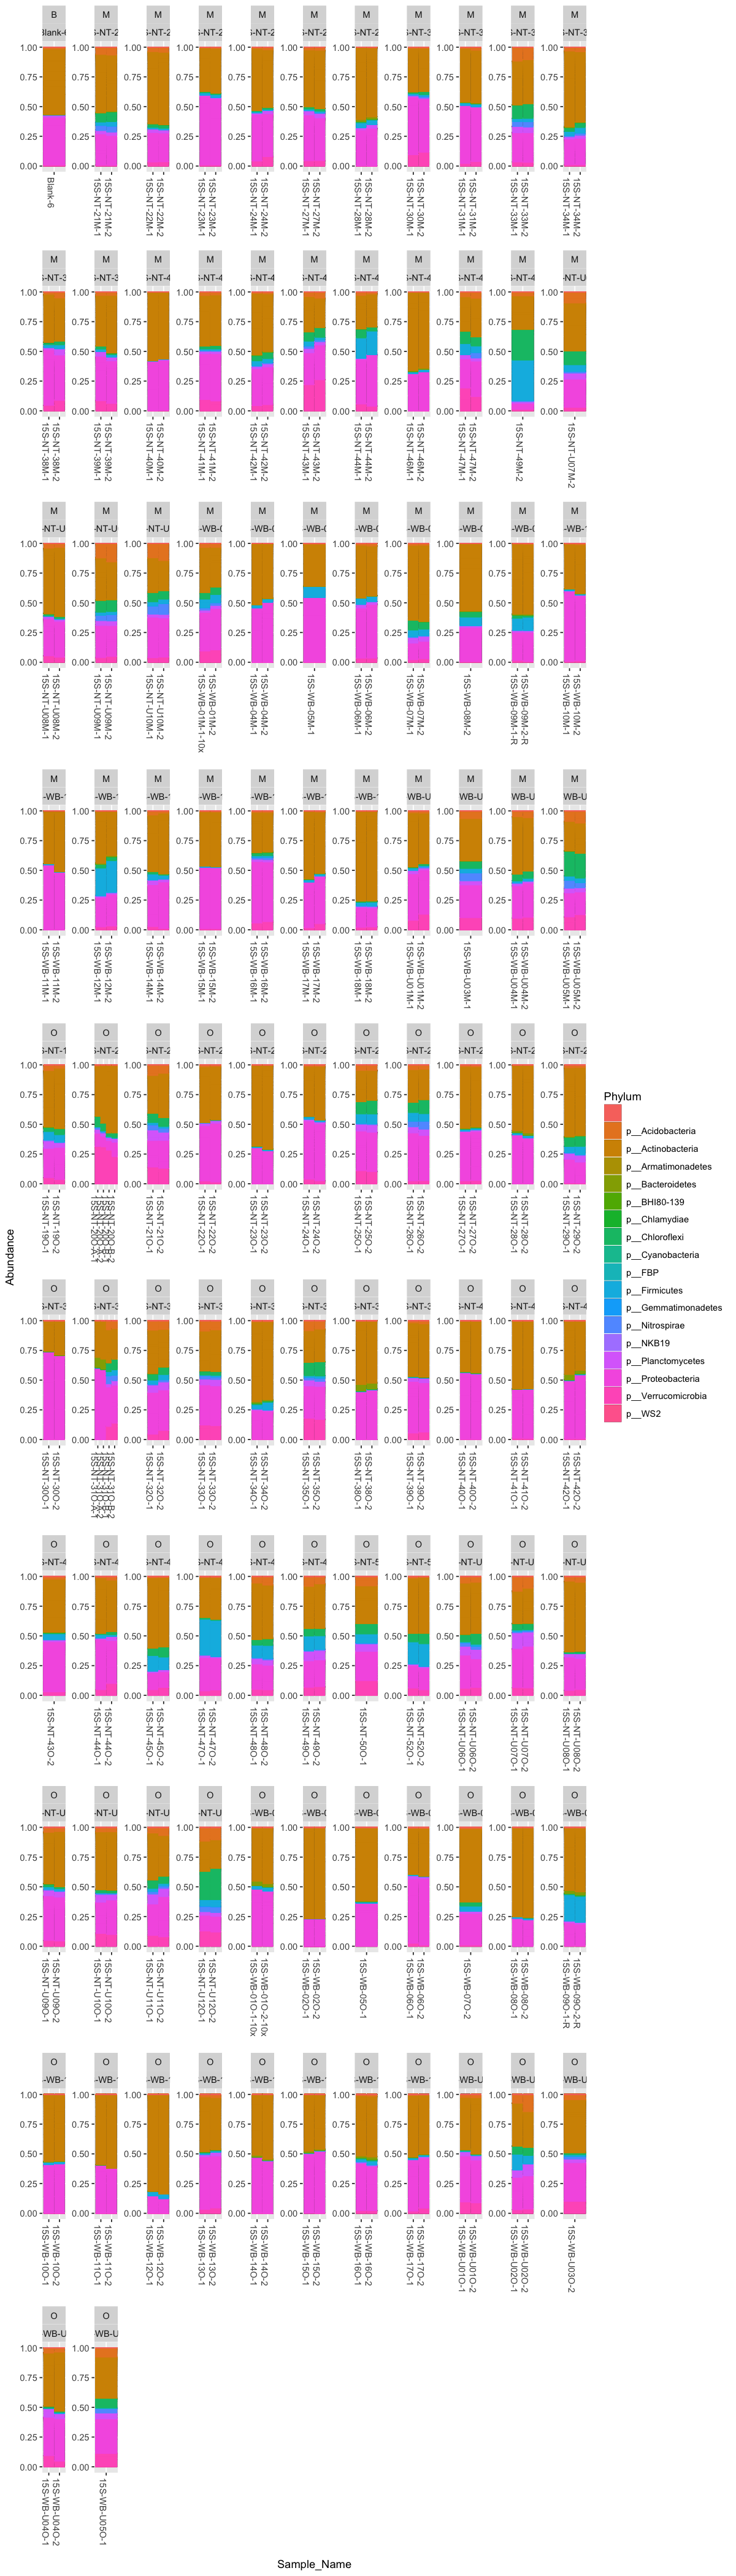

In [251]:
options(repr.plot.width=10, repr.plot.height=35)

plot_bar(ps, fill="Phylum", x="Sample_Name") + facet_wrap(~Org_or_Min+Sample_ID, scales="free") + geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")

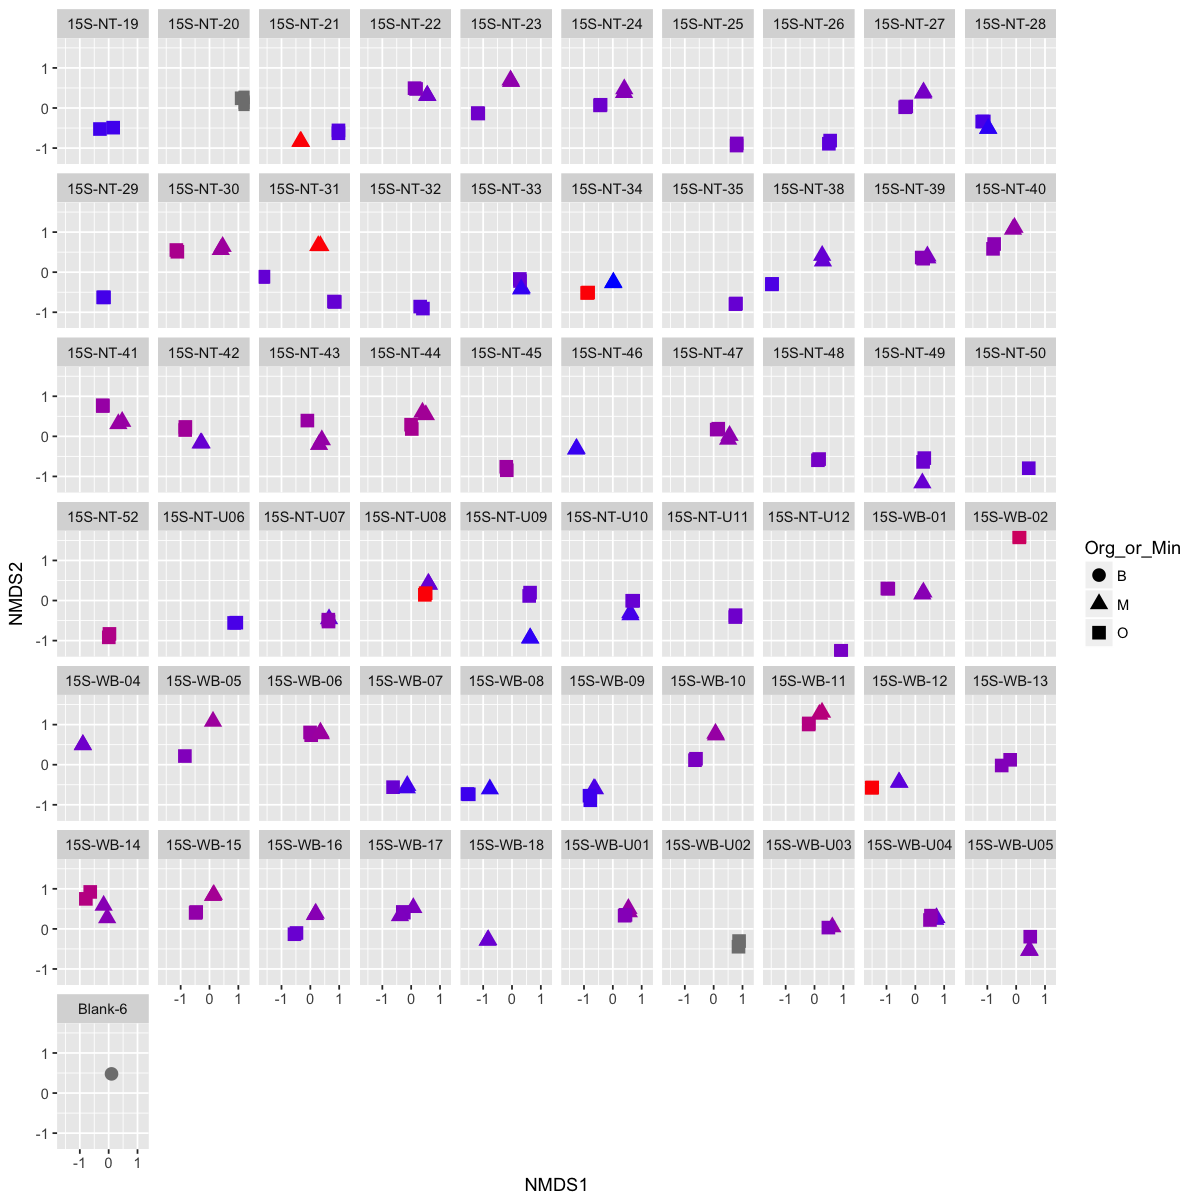

In [239]:
options(repr.plot.width=10, repr.plot.height=10)
p = plot_ordination(ps, ord, color = "pH", shape="Org_or_Min")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + facet_wrap(~Site_ID, ncol=10) + scale_color_gradient(low="red",high="blue") + guides(color=FALSE)
p

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

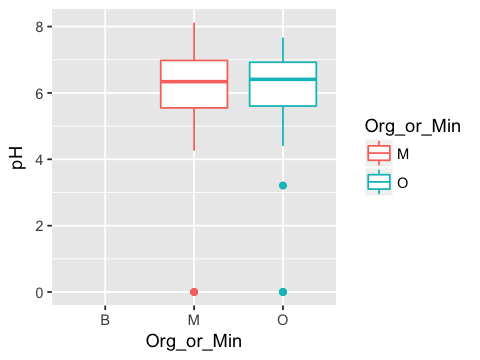

In [248]:
options(repr.plot.width=4, repr.plot.height=3)
p = ggplot(sample_data(ps),aes(y=pH,x=Org_or_Min, color=Org_or_Min))
p = p + geom_boxplot() 
p

## Sample replicates look pretty similar, so we'll merge them for the ordination

In [287]:
ps.merged = merge_samples(ps, "Sample_ID")
ps.merged = transform_sample_counts(ps.merged, function(x) x / sum(x) )
# Note: this averages all sample data - so doesn't work for non-numeric parameters

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

In [288]:
names=colnames(sample_data(ps))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps)[ , -which(names(sample_data(ps)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

In [257]:
ord = ordinate(ps.merged, method = "NMDS", distance = "bray", weighted=TRUE, k=2, trymax=1000)

Run 0 stress 0.1368981 
Run 1 stress 0.1369477 
... Procrustes: rmse 0.002476024  max resid 0.02062856 
Run 2 stress 0.1368981 
... Procrustes: rmse 2.31792e-05  max resid 0.0002157028 
... Similar to previous best
Run 3 stress 0.1718401 
Run 4 stress 0.1369476 
... Procrustes: rmse 0.002628196  max resid 0.02189788 
Run 5 stress 0.1368981 
... Procrustes: rmse 2.107683e-05  max resid 0.0001753422 
... Similar to previous best
Run 6 stress 0.1368981 
... Procrustes: rmse 6.356324e-05  max resid 0.000587657 
... Similar to previous best
Run 7 stress 0.1369476 
... Procrustes: rmse 0.002604765  max resid 0.0216963 
Run 8 stress 0.1369476 
... Procrustes: rmse 0.002661676  max resid 0.02217308 
Run 9 stress 0.1368981 
... New best solution
... Procrustes: rmse 1.05385e-05  max resid 9.190774e-05 
... Similar to previous best
Run 10 stress 0.1368981 
... Procrustes: rmse 1.704302e-05  max resid 0.0001534394 
... Similar to previous best
Run 11 stress 0.1369476 
... Procrustes: rmse 0.00262

## Wondering if the organic and mineral samples from the same site are similar

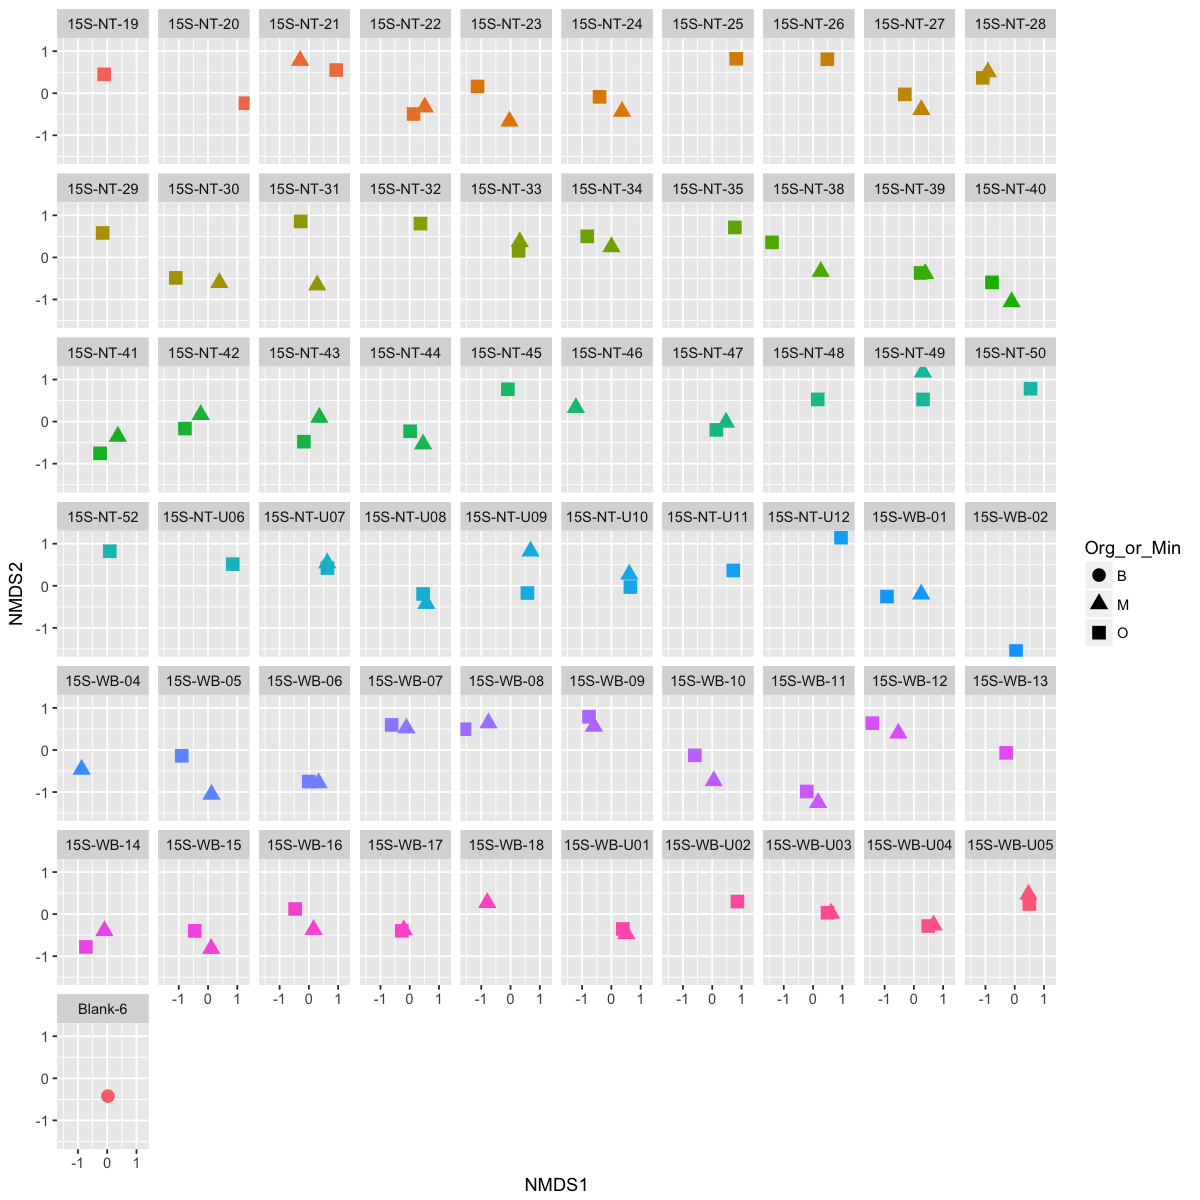

In [189]:
options(repr.plot.width=10, repr.plot.height=10)
p = plot_ordination(ps.merged, ord, color = "Site_ID", shape="Org_or_Min")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + facet_wrap(~Site_ID, ncol=10) + guides(color=FALSE)#+ scale_color_gradient(low="red",high="blue") 
p

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”

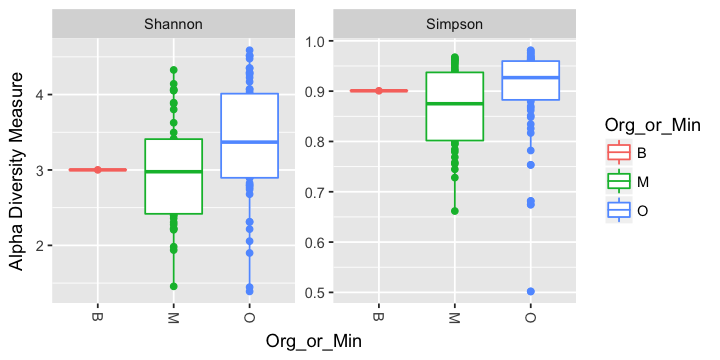

In [260]:
options(repr.plot.width=6, repr.plot.height=3)
plot_richness(ps.merged,measures=c("Shannon", "Simpson"), color="Org_or_Min", x="Org_or_Min") + geom_boxplot()
# x="Site_ID" 

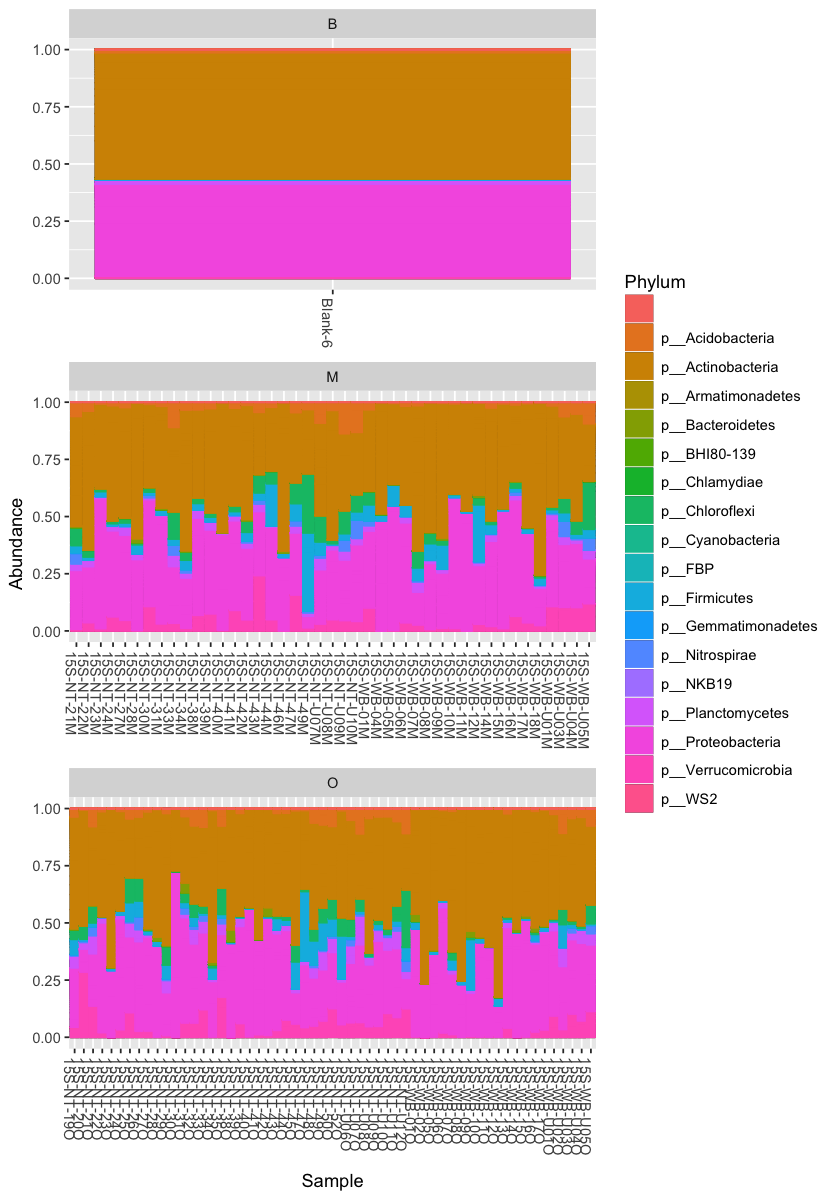

In [289]:
options(repr.plot.width=7, repr.plot.height=10)

plot_bar(ps.merged, fill="Phylum") + geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+ facet_wrap(~Org_or_Min,ncol=1, scales="free")